In [25]:
import numpy as np
def norm(v):
    return np.linalg.norm(v)
def deg(g):
    return g*(180/np.pi)
#Tenemos como datos r0, v0
mu = 8
r0 = [-1.0, 1.2, 1.6]
r0=np.array(r0)
v0 = [-0.8, -0.3, 0.0]
v0=np.array(v0)

#2.1. Calcular uh,ue,up
#momento cinético h y vector excentricidad
print('2.1.')
h = np.cross(r0,v0)
e = (1/mu)*np.cross(v0,h) - r0/norm(r0)
print('h =', h)
print('e =', e)
uh = h/norm(h)
ue = e/norm(e)
up = np.cross(uh,ue)
print('ue = ',ue,'uh =',uh,'up =',up)

p=(norm(h)**2)/mu #luego usaremos que p=a(1-e^2)
print('p =',p)

#2.2. Ángulos que definen la orientación de la órbita i, OM, om
print('\n2.2.')
i = np.arccos(h[2]/norm(h))
OM = np.arctan2(h[0],-h[1])
om = np.arctan2(e[2]/np.sin(i),e[0]*np.cos(OM)+e[1]*np.sin(OM))
print('Ángulos en grados:','i =',deg(i),'OM =',deg(OM),'om =',deg(om))

#2.3.a y e
print('\n2.3.')
a= p/(1-(norm(e)**2))
print('e =',norm(e),'a =',a)

#2.4. b,rm,rx,n,T
print('\n2.4.')
b = a*(1-norm(e)**2)**(1/2)
c=(a**2 - b**2)**(1/2)
rmax=a+c
rmin=a-c
n = mu**(1/2)/a**(3/2)
T = 2*np.pi/n
print('b =',b,'rmin = ',rmin,'rmax =',rmax,'n =',n,'T =',T)

#2.5. Coordenadas x e y iniciales en triedro perifocal
print('\n2.5.')
x0 = np.dot(r0,ue)
y0 = np.dot(r0,up)
print('En triedro perifocal:','x0 =',x0,'y0 =',y0)

#2.6. f,E,M (rad)
print('\n2.6.')
cosf0 = (1/norm(e))*(p/norm(r0) - 1)
f0 = np.arccos(cosf0)
tanE0entre2 = np.sqrt( (1-norm(e))/(1+norm(e)) ) * np.tan(f0/2)
E0 = 2*np.arctan(tanE0entre2)
M0 = E0-norm(e)*np.sin(E0)
print('f0 =',f0,'rad,','E0 =',E0,'rad,','M0 =',M0,'rad')

#2.7. tau
print('\n2.7.')
tau = T-M0/n
print('tau = ',tau)

#Ahora miramos posición en t+dt, dt=1
#3.1. M1
print('\n3.1.')
dt = 1
M1 = M0 + n*dt
print('M1 =',M1)

#3.2 E1
print('\n3.2.')
def Eimas1(Ei,M1):
    return Ei-(Ei-norm(e)*np.sin(Ei)-M1)/(1-norm(e)*np.cos(Ei))

def E(Ei,it,M1):
    E1=Ei
    for i in range(it):
        Eli=E1
        E1=Eimas1(E1,M1)
        deltaE1 = abs(E1-Eli)
    return E1, deltaE1
it = 20
E1=1 #valor inicial
E1, deltaE1 = E(E1,it,M1)

print('E1 =',E1,'con',it,'iteraciones;','deltaE1 =',deltaE1)

#3.3. valor de dE/dt
print('\n3.3.')
E1dot = n/(1-norm(e)*np.cos(E1))
print('E1dot =',E1dot)

#3.4. x1,y1,x1dot,y1dot en triedro perifocal
print('\n3.4.')
x1=a*(np.cos(E1)-norm(e))
y1=a*((1-norm(e)**2)**(1/2))*np.sin(E1)
x1dot=-a*np.sin(E1)*E1dot
y1dot=a*((1-norm(e)**2)**(1/2))*np.cos(E1)*E1dot
print('x1 =',x1,', y1 =',y1,', x1dot =',x1dot,', y1dot =',y1dot)

#3.5. r1 y v1 en el triedro de referencia
print('\n3.5.')
r1 = x1*ue + y1*up
v1 = x1dot*ue + y1dot*up
print('r1 =',r1,'v1 =',v1)

2.1.
h = [ 0.48 -1.28  1.26]
e = [ 0.3999636  -0.41065631 -0.56954175]
ue =  [ 0.49495772 -0.50819003 -0.70481186] uh = [ 0.25818395 -0.68849053  0.67773287] up = [0.82967337 0.51742022 0.20956719]
p = 0.4320500000000001

2.2.
Ángulos en grados: i = 47.33326578203508 OM = 20.55604521958346 om = -73.4407976394192

2.3.
e = 0.8080762925791638 a = 1.245055276974499

2.4.
b = 0.7334344772485354 rmin =  0.238955624700822 rmax = 2.251154929248176 n = 2.035926257396349 T = 3.0861556425991865

2.5.
En triedro perifocal: x0 = -2.2324847221316766 y0 = 0.12653839515598386

2.6.
f0 = 3.084972715575173 rad, E0 = 2.9681965029754003 rad, M0 = 2.8287802628087717 rad

2.7.
tau =  1.6967240497150873

3.1.
M1 = 4.864706520205121

3.2.
E1 = 4.171840461410572 con 20 iteraciones; deltaE1 = 8.881784197001252e-16

3.3.
E1dot = 1.4379622732098427

3.4.
x1 = -1.646813045952127 , y1 = -0.6288661854108899 , x1dot = 1.5350871874196552 , y1dot = -0.5427301929072705

3.5.
r1 = [-1.33685635  0.51150589  1.02890364] v

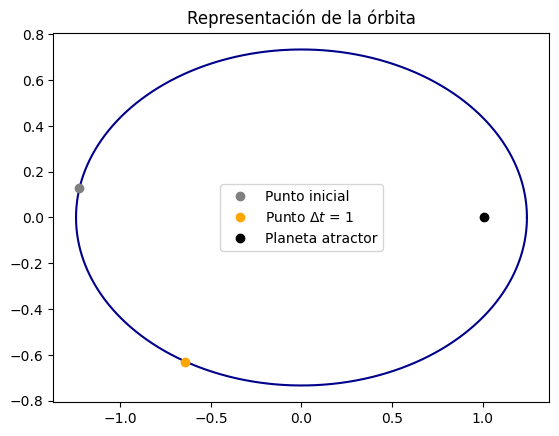

In [23]:
import matplotlib.pyplot as plt
def ellipse(pri=-a,fin=a,ene=10**5):
    x=np.linspace(pri,fin,ene)
    yp=[]
    yn=[]
    for i in range(ene):
        y2 = b**2 * (1 - (x[i]/a)**2)
        ypi = y2**(1/2)
        yni = -ypi
        yp.append(ypi)
        yn.append(yni)
    return x,yp,yn
def point(E):
    x=a*np.cos(E)
    y2 = b**2 * (1 - (x/a)**2)
    y= (2*(np.sin(E)>=0)-1)*y2**(1/2)
    return x,y

xi,yp,yn = ellipse()
plt.title('Representación de la órbita')
plt.plot(xi,yp,'darkblue')
plt.plot(xi,yn,'darkblue')
dt=1
plt.plot(point(E0)[0],point(E0)[1],'o',color='gray',label='Punto inicial')
plt.plot(point(E1)[0],point(E1)[1],'o',color='orange',label=r'Punto $\Delta t$ = '+str(dt))

plt.plot(c,0,'o', color='black', label='Planeta atractor')


plt.legend()
plt.show()
